In [1]:
import numpy as np
import pandas as pd

# Basic data structures

1. Series
2. DataFrame

# Object creation

In [2]:
# Dummy series
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# Date range of 6 days
dates = pd.date_range('20241101', periods=6)
dates

DatetimeIndex(['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04',
               '2024-11-05', '2024-11-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Simulating collected 4 categories of data over 6 days
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2024-11-01,-0.829458,1.756519,-1.438445,-0.285957
2024-11-02,1.471235,0.027503,-0.381131,0.000038
2024-11-03,-0.085935,2.046060,0.332911,-0.055033
2024-11-04,-2.352256,-1.726702,-0.079825,0.755990
2024-11-05,0.285872,0.281933,-0.513036,0.116628
2024-11-06,0.568480,-1.312432,0.508122,-0.565551


In [5]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like
df2 = pd.DataFrame({
    'A': 1.0,
    'B': pd.Timestamp('20241101'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'F': 'foo'
})

df2

,A,B,C,D,F
0,1.0,2024-11-01,1.0,3,foo
1,1.0,2024-11-01,1.0,3,foo
2,1.0,2024-11-01,1.0,3,foo
3,1.0,2024-11-01,1.0,3,foo


In [6]:
# dtypes of DataFrame columns
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
F           object
dtype: object

# Viewing data

In [7]:
df.head()

,A,B,C,D
2024-11-01,-0.829458,1.756519,-1.438445,-0.285957
2024-11-02,1.471235,0.027503,-0.381131,0.000038
2024-11-03,-0.085935,2.046060,0.332911,-0.055033
2024-11-04,-2.352256,-1.726702,-0.079825,0.755990
2024-11-05,0.285872,0.281933,-0.513036,0.116628


In [8]:
df.tail()

,A,B,C,D
2024-11-02,1.471235,0.027503,-0.381131,0.000038
2024-11-03,-0.085935,2.046060,0.332911,-0.055033
2024-11-04,-2.352256,-1.726702,-0.079825,0.755990
2024-11-05,0.285872,0.281933,-0.513036,0.116628
2024-11-06,0.568480,-1.312432,0.508122,-0.565551


In [9]:
df.index

DatetimeIndex(['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04',
               '2024-11-05', '2024-11-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.to_numpy()

array([[-8.29457914e-01,  1.75651942e+00, -1.43844486e+00,
        -2.85956860e-01],
       [ 1.47123549e+00,  2.75028365e-02, -3.81130841e-01,
         3.80256571e-05],
       [-8.59351578e-02,  2.04606047e+00,  3.32911125e-01,
        -5.50333511e-02],
       [-2.35225601e+00, -1.72670200e+00, -7.98252682e-02,
         7.55989719e-01],
       [ 2.85872156e-01,  2.81933102e-01, -5.13035637e-01,
         1.16628480e-01],
       [ 5.68479591e-01, -1.31243185e+00,  5.08122252e-01,
        -5.65551447e-01]])

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2024-11-01 00:00:00'), 1.0, 3, 'foo'],
       [1.0, Timestamp('2024-11-01 00:00:00'), 1.0, 3, 'foo'],
       [1.0, Timestamp('2024-11-01 00:00:00'), 1.0, 3, 'foo'],
       [1.0, Timestamp('2024-11-01 00:00:00'), 1.0, 3, 'foo']],
      dtype=object)

In [13]:
# Descriptive statistics of DataFrame
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.157010,0.178814,-0.261901,-0.005648
std,1.315295,1.540396,0.698774,0.444877
min,-2.352256,-1.726702,-1.438445,-0.565551
25%,-0.643577,-0.977448,-0.480059,-0.228226
50%,0.099968,0.154718,-0.230478,-0.027498
75%,0.497828,1.387873,0.229727,0.087481
max,1.471235,2.046060,0.508122,0.755990


In [14]:
# Transpose DataFrame
df.T

,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,2024-11-06
A,-0.829458,1.471235,-0.085935,-2.352256,0.285872,0.568480
B,1.756519,0.027503,2.046060,-1.726702,0.281933,-1.312432
C,-1.438445,-0.381131,0.332911,-0.079825,-0.513036,0.508122
D,-0.285957,0.000038,-0.055033,0.755990,0.116628,-0.565551


In [15]:
# Sort columns in reverse name order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2024-11-01,-0.285957,-1.438445,1.756519,-0.829458
2024-11-02,0.000038,-0.381131,0.027503,1.471235
2024-11-03,-0.055033,0.332911,2.046060,-0.085935
2024-11-04,0.755990,-0.079825,-1.726702,-2.352256
2024-11-05,0.116628,-0.513036,0.281933,0.285872
2024-11-06,-0.565551,0.508122,-1.312432,0.568480


In [16]:
# Sort by column values
df.sort_values(by='B')

,A,B,C,D
2024-11-04,-2.352256,-1.726702,-0.079825,0.755990
2024-11-06,0.568480,-1.312432,0.508122,-0.565551
2024-11-02,1.471235,0.027503,-0.381131,0.000038
2024-11-05,0.285872,0.281933,-0.513036,0.116628
2024-11-01,-0.829458,1.756519,-1.438445,-0.285957
2024-11-03,-0.085935,2.046060,0.332911,-0.055033


# Selection by []

In [17]:
# Selection column with []
df['A']

2024-11-01   -0.829458
2024-11-02    1.471235
2024-11-03   -0.085935
2024-11-04   -2.352256
2024-11-05    0.285872
2024-11-06    0.568480
Freq: D, Name: A, dtype: float64

In [18]:
# Select rows with slicing
df[0:3]

,A,B,C,D
2024-11-01,-0.829458,1.756519,-1.438445,-0.285957
2024-11-02,1.471235,0.027503,-0.381131,0.000038
2024-11-03,-0.085935,2.046060,0.332911,-0.055033


# Selection by label: `.loc`

In [19]:
# Select row matching label
df.loc['20241101']

A   -0.829458
B    1.756519
C   -1.438445
D   -0.285957
Name: 2024-11-01 00:00:00, dtype: float64

In [20]:
# Select all rows and given columns
df.loc[:, ['A', 'B']]

,A,B
2024-11-01,-0.829458,1.756519
2024-11-02,1.471235,0.027503
2024-11-03,-0.085935,2.046060
2024-11-04,-2.352256,-1.726702
2024-11-05,0.285872,0.281933
2024-11-06,0.568480,-1.312432


In [21]:
# Select some rows and some columns
df.loc['20241101':'20241104', ['A', 'B']]

,A,B
2024-11-01,-0.829458,1.756519
2024-11-02,1.471235,0.027503
2024-11-03,-0.085935,2.046060
2024-11-04,-2.352256,-1.726702


In [22]:
# Select value at given row and column
%timeit df.loc['20241102', 'A']

61.8 μs ± 3.79 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [23]:
# Faster way of selecting value at given row and column
%timeit df.at['20241102', 'A']

14.1 μs ± 300 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Selection by position: `.iloc`

In [24]:
# Select row by integer position
df.iloc[3]

A   -2.352256
B   -1.726702
C   -0.079825
D    0.755990
Name: 2024-11-04 00:00:00, dtype: float64

In [25]:
# Select rows and columns with slices of integer positions
df.iloc[3:5, 0:2]

,A,B
2024-11-04,-2.352256,-1.726702
2024-11-05,0.285872,0.281933


In [26]:
# Select rows and columns with lists of integer positions
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2024-11-02,1.471235,-0.381131
2024-11-03,-0.085935,0.332911
2024-11-05,0.285872,-0.513036


In [27]:
# Select some rows and all columns
df.iloc[1:3, :]

,A,B,C,D
2024-11-02,1.471235,0.027503,-0.381131,0.000038
2024-11-03,-0.085935,2.046060,0.332911,-0.055033


In [28]:
# Select all rows and some columns
df.iloc[:, 1:3]

,B,C
2024-11-01,1.756519,-1.438445
2024-11-02,0.027503,-0.381131
2024-11-03,2.046060,0.332911
2024-11-04,-1.726702,-0.079825
2024-11-05,0.281933,-0.513036
2024-11-06,-1.312432,0.508122


In [29]:
# Select value by row and column positions
%timeit df.iloc[1, 1]

11.7 μs ± 92.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [30]:
# Faster way of selecting value by row and column positions
%timeit df.iat[1, 1]

8.66 μs ± 174 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Boolean indexing

In [31]:
# Select rows where df['A'] > 0
df[df['A'] > 0]

,A,B,C,D
2024-11-02,1.471235,0.027503,-0.381131,0.000038
2024-11-05,0.285872,0.281933,-0.513036,0.116628
2024-11-06,0.568480,-1.312432,0.508122,-0.565551


In [32]:
# Select DataFrame values meeting a boolean condition
# Here: Select positive values
df[df > 0]

,A,B,C,D
2024-11-01,NaN,1.756519,NaN,NaN
2024-11-02,1.471235,0.027503,NaN,0.000038
2024-11-03,NaN,2.046060,0.332911,NaN
2024-11-04,NaN,NaN,NaN,0.755990
2024-11-05,0.285872,0.281933,NaN,0.116628
2024-11-06,0.568480,NaN,0.508122,NaN


In [33]:
# Filter with isin() method
df2 = df.copy()

# Add new column
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

# Filter rows with values in a list
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2024-11-03,-0.085935,2.046060,0.332911,-0.055033,two
2024-11-05,0.285872,0.281933,-0.513036,0.116628,four


# Setting

In [34]:
# Add new column
# Values automatically aligned to DataFrame index
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20241102', periods=6))

df['F'] = s1
df

,A,B,C,D,F
2024-11-01,-0.829458,1.756519,-1.438445,-0.285957,NaN
2024-11-02,1.471235,0.027503,-0.381131,0.000038,1.0
2024-11-03,-0.085935,2.046060,0.332911,-0.055033,2.0
2024-11-04,-2.352256,-1.726702,-0.079825,0.755990,3.0
2024-11-05,0.285872,0.281933,-0.513036,0.116628,4.0
2024-11-06,0.568480,-1.312432,0.508122,-0.565551,5.0


In [35]:
# Set values by label
df.at['20241101', 'A'] = 0
df

,A,B,C,D,F
2024-11-01,0.000000,1.756519,-1.438445,-0.285957,NaN
2024-11-02,1.471235,0.027503,-0.381131,0.000038,1.0
2024-11-03,-0.085935,2.046060,0.332911,-0.055033,2.0
2024-11-04,-2.352256,-1.726702,-0.079825,0.755990,3.0
2024-11-05,0.285872,0.281933,-0.513036,0.116628,4.0
2024-11-06,0.568480,-1.312432,0.508122,-0.565551,5.0


In [36]:
# Set values by position
df.iat[0, 1] = 0
df

,A,B,C,D,F
2024-11-01,0.000000,0.000000,-1.438445,-0.285957,NaN
2024-11-02,1.471235,0.027503,-0.381131,0.000038,1.0
2024-11-03,-0.085935,2.046060,0.332911,-0.055033,2.0
2024-11-04,-2.352256,-1.726702,-0.079825,0.755990,3.0
2024-11-05,0.285872,0.281933,-0.513036,0.116628,4.0
2024-11-06,0.568480,-1.312432,0.508122,-0.565551,5.0


In [37]:
# Set by assigning a numpy array
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2024-11-01,0.000000,0.000000,-1.438445,5.0,NaN
2024-11-02,1.471235,0.027503,-0.381131,5.0,1.0
2024-11-03,-0.085935,2.046060,0.332911,5.0,2.0
2024-11-04,-2.352256,-1.726702,-0.079825,5.0,3.0
2024-11-05,0.285872,0.281933,-0.513036,5.0,4.0
2024-11-06,0.568480,-1.312432,0.508122,5.0,5.0


In [38]:
# Set values where certain conditions are met
df2 = df.copy()

# Make positive values negative
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2024-11-01,0.000000,0.000000,-1.438445,-5.0,NaN
2024-11-02,-1.471235,-0.027503,-0.381131,-5.0,-1.0
2024-11-03,-0.085935,-2.046060,-0.332911,-5.0,-2.0
2024-11-04,-2.352256,-1.726702,-0.079825,-5.0,-3.0
2024-11-05,-0.285872,-0.281933,-0.513036,-5.0,-4.0
2024-11-06,-0.568480,-1.312432,-0.508122,-5.0,-5.0


# Missing data

- `np.nan` represents missing data in NumPy data types
- `np.nan` values are excluded from computation by default

In [39]:
# Reindexing allows you to change/add/delete the index on a specified axis
# Create new DataFrame with missing values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2024-11-01,0.000000,0.000000,-1.438445,5.0,NaN,1.0
2024-11-02,1.471235,0.027503,-0.381131,5.0,1.0,1.0
2024-11-03,-0.085935,2.046060,0.332911,5.0,2.0,NaN
2024-11-04,-2.352256,-1.726702,-0.079825,5.0,3.0,NaN


In [40]:
# Drop rows with missing data
df1.dropna(how='any')

,A,B,C,D,F,E
2024-11-02,1.471235,0.027503,-0.381131,5.0,1.0,1.0


In [41]:
# Fill in missing data with specified value
df1.fillna(value=5)

,A,B,C,D,F,E
2024-11-01,0.000000,0.000000,-1.438445,5.0,5.0,1.0
2024-11-02,1.471235,0.027503,-0.381131,5.0,1.0,1.0
2024-11-03,-0.085935,2.046060,0.332911,5.0,2.0,5.0
2024-11-04,-2.352256,-1.726702,-0.079825,5.0,3.0,5.0


In [42]:
# Get boolean mask showing where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2024-11-01,False,False,False,False,True,False
2024-11-02,False,False,False,False,False,False
2024-11-03,False,False,False,False,False,True
2024-11-04,False,False,False,False,False,True


# Stats operations

In [43]:
# Calculate mean of each column
df.mean()

A   -0.018767
B   -0.113940
C   -0.261901
D    5.000000
F    3.000000
dtype: float64

In [44]:
# Calculate mean of each row
df.mean(1)

2024-11-01    0.890389
2024-11-02    1.423521
2024-11-03    1.858607
2024-11-04    0.768243
2024-11-05    1.810954
2024-11-06    1.952834
Freq: D, dtype: float64

# Binary operations

In [45]:
# Operations between two Series/DataFrames:
#   Result aligned along union of indices/column labels
#   Broadcast along specified axis
#   Unaligned values filled with NaN
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
df.sub(s, axis='index')

,A,B,C,D,F
2024-11-01,NaN,NaN,NaN,NaN,NaN
2024-11-02,NaN,NaN,NaN,NaN,NaN
2024-11-03,-1.085935,1.046060,-0.667089,4.0,1.0
2024-11-04,-5.352256,-4.726702,-3.079825,2.0,0.0
2024-11-05,-4.714128,-4.718067,-5.513036,0.0,-1.0
2024-11-06,NaN,NaN,NaN,NaN,NaN


# User defined functions

In [46]:
# Apply user defined reduction
df.agg(lambda col: np.mean(col) * 5.6)

A    -0.105097
B    -0.638062
C    -1.466643
D    28.000000
F    16.800000
dtype: float64

In [47]:
# Apply user defined broadcast
df.transform(lambda val: val * 101.2)

,A,B,C,D,F
2024-11-01,0.000000,0.000000,-145.570619,506.0,NaN
2024-11-02,148.889031,2.783287,-38.570441,506.0,101.2
2024-11-03,-8.696638,207.061319,33.690606,506.0,202.4
2024-11-04,-238.048308,-174.742242,-8.078317,506.0,303.6
2024-11-05,28.930262,28.531630,-51.919206,506.0,404.8
2024-11-06,57.530135,-132.818103,51.421972,506.0,506.0


# Value counts

In [48]:
# Count values in a series
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

5    4
4    3
0    1
6    1
1    1
Name: count, dtype: int64

# String methods

In [49]:
# Apply string operation to values in Series
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Concatenation

In [50]:
# Create DataFrame of random floats
df = pd.DataFrame(np.random.randn(10, 4))

# Split DataFrame into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [51]:
pieces[0]

,0,1,2,3
0,-1.142077,0.405799,0.540390,-0.169233
1,-0.616690,0.300928,0.480300,0.449728
2,-0.011521,0.512097,0.132157,-1.641930


In [52]:
pieces[1]

,0,1,2,3
3,1.565492,0.278537,1.602590,-0.709865
4,0.492262,1.630107,-0.431497,-0.401272
5,0.274858,-0.126049,-0.785750,-0.042048
6,-0.540148,0.025339,-1.191681,1.753765


In [53]:
pieces[2]

,0,1,2,3
7,-1.779756,-0.995565,1.020892,1.070892
8,-0.160950,0.825398,-0.499887,0.933730
9,-0.673302,-0.835260,-3.773073,-0.950420


In [54]:

# Concatenate pieces back into DataFrame
pd.concat(pieces)

,0,1,2,3
0,-1.142077,0.405799,0.540390,-0.169233
1,-0.616690,0.300928,0.480300,0.449728
2,-0.011521,0.512097,0.132157,-1.641930
3,1.565492,0.278537,1.602590,-0.709865
4,0.492262,1.630107,-0.431497,-0.401272
5,0.274858,-0.126049,-0.785750,-0.042048
6,-0.540148,0.025339,-1.191681,1.753765
7,-1.779756,-0.995565,1.020892,1.070892
8,-0.160950,0.825398,-0.499887,0.933730
9,-0.673302,-0.835260,-3.773073,-0.950420


# Joining

In [55]:
# Create two DataFrames with a shared key
left = pd.DataFrame({
    'key': ['foo', 'foo'],
    'lval': [1, 2]
})
left

,key,lval
0,foo,1
1,foo,2


In [56]:
# Create two DataFrames with a shared key
right = pd.DataFrame({
    'key': ['foo', 'foo'], 
    'rval': [4, 5]
})
right

,key,rval
0,foo,4
1,foo,5


In [57]:
# Merge DataFrames on shared key
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [58]:
# Create DataFrames with multiple keys
left2 = pd.DataFrame({
    'key': ['foo', 'bar'],
    'lval': [1, 2]
})
left2

,key,lval
0,foo,1
1,bar,2


In [59]:
# Create DataFrames with multiple keys
right2 = pd.DataFrame({
    'key': ['foo', 'bar'],
    'rval': [4, 5]
})
right2

,key,rval
0,foo,4
1,bar,5


In [60]:
# Merge DataFrames on key
pd.merge(left2, right2, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

- Split data into groups based on some criteria
- Apply a function to each group independently
- Combine results into a single data structure

In [61]:
# Create DataFrame
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})

df

,A,B,C,D
0,foo,one,-0.046338,-0.560273
1,bar,one,0.246172,0.175676
2,foo,two,1.689949,-0.535450
3,bar,three,2.274399,-0.953523
4,foo,two,-1.035362,0.340811
5,bar,two,-2.470516,0.862296
6,foo,one,0.879267,-0.057451
7,foo,three,1.222405,0.241273


In [62]:
# Group by column, sum specified columns
df.groupby('A')[['C', 'D']].sum()

,C,D
A,,
bar,0.050055,0.084449
foo,2.709920,-0.571091


In [63]:
# Group by multiple columns, sum remaining columns
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.246172  0.175676
    three  2.274399 -0.953523
    two   -2.470516  0.862296
foo one    0.832929 -0.617725
    three  1.222405  0.241273
    two    0.654586 -0.194639

# Stacking

In [64]:
# Create DataFrame with hierarchical index
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.751013 -1.857785
      two     0.580194 -1.434655
baz   one    -1.000062  0.743168
      two     0.087063 -1.469847
foo   one     1.458297  2.022984
      two    -0.622426  0.788375
qux   one     0.253955  0.319694
      two    -0.438621 -1.368967

In [65]:
# Stack DataFrame, turning columns into indices
df.stack(future_stack=True)

first  second   
bar    one     A   -0.751013
               B   -1.857785
       two     A    0.580194
               B   -1.434655
baz    one     A   -1.000062
               B    0.743168
       two     A    0.087063
               B   -1.469847
foo    one     A    1.458297
               B    2.022984
       two     A   -0.622426
               B    0.788375
qux    one     A    0.253955
               B    0.319694
       two     A   -0.438621
               B   -1.368967
dtype: float64

In [66]:
# Unstack DataFrame, turning lowest level of index into columns
stacked = df.stack()
stacked.unstack()

A         B
first second                    
bar   one    -0.751013 -1.857785
      two     0.580194 -1.434655
baz   one    -1.000062  0.743168
      two     0.087063 -1.469847
foo   one     1.458297  2.022984
      two    -0.622426  0.788375
qux   one     0.253955  0.319694
      two    -0.438621 -1.368967

In [67]:
# Unstack level 1 of index into columns
stacked.unstack(1)

second        one       two
first                      
bar   A -0.751013  0.580194
      B -1.857785 -1.434655
baz   A -1.000062  0.087063
      B  0.743168 -1.469847
foo   A  1.458297 -0.622426
      B  2.022984  0.788375
qux   A  0.253955 -0.438621
      B  0.319694 -1.368967

In [68]:
# Unstack level 0 of index into columns
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.751013 -1.000062  1.458297  0.253955
       B -1.857785  0.743168  2.022984  0.319694
two    A  0.580194  0.087063 -0.622426 -0.438621
       B -1.434655 -1.469847  0.788375 -1.368967

# Pivot tables

In [69]:
# Create DataFrame
df = pd.DataFrame({
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A','B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randn(12),
    'E': np.random.randn(12)
})

df

,A,B,C,D,E
0,one,A,foo,1.207667,2.473772
1,one,B,foo,0.581695,0.167001
2,two,C,foo,-2.108666,-0.716952
3,three,A,bar,0.846754,1.350564
4,one,B,bar,0.729038,-1.097378
5,one,C,bar,-1.739905,-0.211401
6,two,A,foo,-0.164453,0.534715
7,three,B,foo,1.265657,-1.719474
8,one,C,foo,1.447214,-0.471112
9,one,A,bar,-0.385591,0.829544


In [70]:
# Create pivot table from DataFrame with specified values, index, and columns
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.385591  1.207667
      B  0.729038  0.581695
      C -1.739905  1.447214
three A  0.846754       NaN
      B       NaN  1.265657
      C  0.662192       NaN
two   A       NaN -0.164453
      B -0.877090       NaN
      C       NaN -2.108666

# Time series

In [71]:
# Create time series with 100 second intervals
rng = pd.date_range('11/1/2024', periods=100, freq='s')
rng

DatetimeIndex(['2024-11-01 00:00:00', '2024-11-01 00:00:01',
               '2024-11-01 00:00:02', '2024-11-01 00:00:03',
               '2024-11-01 00:00:04', '2024-11-01 00:00:05',
               '2024-11-01 00:00:06', '2024-11-01 00:00:07',
               '2024-11-01 00:00:08', '2024-11-01 00:00:09',
               '2024-11-01 00:00:10', '2024-11-01 00:00:11',
               '2024-11-01 00:00:12', '2024-11-01 00:00:13',
               '2024-11-01 00:00:14', '2024-11-01 00:00:15',
               '2024-11-01 00:00:16', '2024-11-01 00:00:17',
               '2024-11-01 00:00:18', '2024-11-01 00:00:19',
               '2024-11-01 00:00:20', '2024-11-01 00:00:21',
               '2024-11-01 00:00:22', '2024-11-01 00:00:23',
               '2024-11-01 00:00:24', '2024-11-01 00:00:25',
               '2024-11-01 00:00:26', '2024-11-01 00:00:27',
               '2024-11-01 00:00:28', '2024-11-01 00:00:29',
               '2024-11-01 00:00:30', '2024-11-01 00:00:31',
               '2024-11-

In [72]:
# Create Series representing random integers occurring at 100 second intervals
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2024-11-01 00:00:00    243
2024-11-01 00:00:01    226
2024-11-01 00:00:02    122
2024-11-01 00:00:03    100
2024-11-01 00:00:04    407
                      ... 
2024-11-01 00:01:35    144
2024-11-01 00:01:36    310
2024-11-01 00:01:37    490
2024-11-01 00:01:38    155
2024-11-01 00:01:39    249
Freq: s, Length: 100, dtype: int64

In [73]:
# Resample time series to 5 minute intervals
ts.resample('5Min').sum()

2024-11-01    28394
Freq: 5min, dtype: int64

In [74]:
# Create DataFrame with time series data, 5 days with single day intervals
rng = pd.date_range("11/1/2024 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2024-11-01   -2.478698
2024-11-02   -0.200995
2024-11-03    0.340630
2024-11-04    1.855798
2024-11-05   -0.054849
Freq: D, dtype: float64

In [75]:
# Localize time series
ts_utc = ts.tz_localize('UTC')
ts_utc

2024-11-01 00:00:00+00:00   -2.478698
2024-11-02 00:00:00+00:00   -0.200995
2024-11-03 00:00:00+00:00    0.340630
2024-11-04 00:00:00+00:00    1.855798
2024-11-05 00:00:00+00:00   -0.054849
Freq: D, dtype: float64

In [76]:
# Convert time zone
ts_utc.tz_convert('US/Eastern')

2024-10-31 20:00:00-04:00   -2.478698
2024-11-01 20:00:00-04:00   -0.200995
2024-11-02 20:00:00-04:00    0.340630
2024-11-03 19:00:00-05:00    1.855798
2024-11-04 19:00:00-05:00   -0.054849
Freq: D, dtype: float64

In [77]:
# Add non-fixed-duration BusinessDay to a time series
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2024-11-08', '2024-11-08', '2024-11-08', '2024-11-11',
               '2024-11-12'],
              dtype='datetime64[ns]', freq=None)

# Categoricals

In [78]:
# Create DataFrame with categorical data
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']
})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [79]:
# Convert raw_grade to categorical data type
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [80]:
# Give categories meaningful names
category_names = ['very good', 'good', 'very bad']
df['grade'] = df['grade'].cat.rename_categories(category_names)

df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [81]:
# Reorder and add new categories
df['grade'] = df['grade'].cat.set_categories(
    ['very bad', 'bad', 'medium', 'good', 'very good']
)

df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [82]:
# Sort values by category order
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [84]:
# Show empty categories when grouping by categories
df.groupby('grade', observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [85]:
# Plot with matplotlib
import matplotlib.pyplot as plt
plt.close('all')

<Axes: >

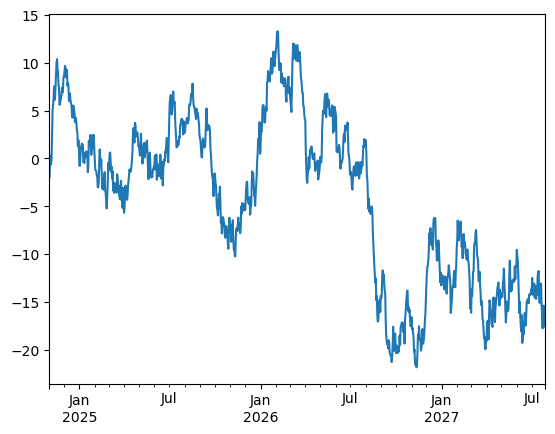

In [86]:
# Create and plot a time series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('11/1/2024', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

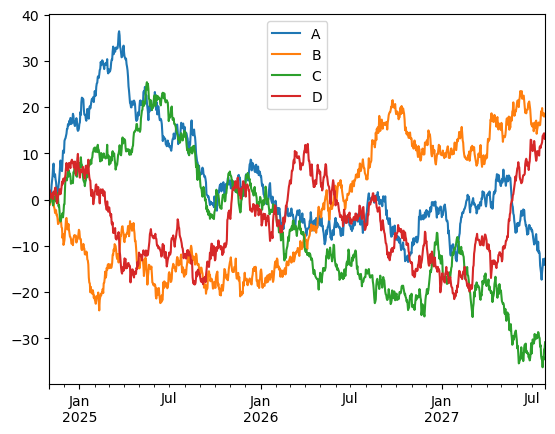

In [88]:
# Plot all columns of a DataFrame
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D']
)
df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

# Importing and exporting data

In [89]:
# Write a DataFrame to csv
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv('foo.csv')

In [90]:
# Read DataFrame from csv
df = pd.read_csv('foo.csv')
df

,Unnamed: 0,0,1,2,3,4
0,0,4,0,4,3,4
1,1,3,4,1,4,4
2,2,1,3,0,3,4
3,3,3,3,1,1,1
4,4,0,3,0,1,4
5,5,3,1,4,3,3
6,6,1,3,2,0,3
7,7,1,4,0,1,0
8,8,2,0,1,2,3
9,9,3,3,3,4,3
